In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
df = pd.read_csv('movies_recommendation.csv')

In [3]:
df.head()

,title,genre,image
0,Arjun Reddy,Romance,img\arjun_reddy.jpg
1,Eega,Fantasy,img\eega.jpeg
2,Magadheera,Action,img\magadherra.jpeg
3,Baahubali: The Beginning,Action,img\bahubali1.jpeg
4,Baahubali: The Conclusion,Action,img\bahubali2.jpeg


In [4]:
df.shape

(31, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   31 non-null     object
 1   genre   31 non-null     object
 2   image   31 non-null     object
dtypes: object(3)
memory usage: 876.0+ bytes


In [6]:
df.isna().sum()

title    0
genre    0
image    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.head()

,title,genre,image
0,Arjun Reddy,Romance,img\arjun_reddy.jpg
1,Eega,Fantasy,img\eega.jpeg
2,Magadheera,Action,img\magadherra.jpeg
3,Baahubali: The Beginning,Action,img\bahubali1.jpeg
4,Baahubali: The Conclusion,Action,img\bahubali2.jpeg


<Axes: xlabel='genre', ylabel='count'>

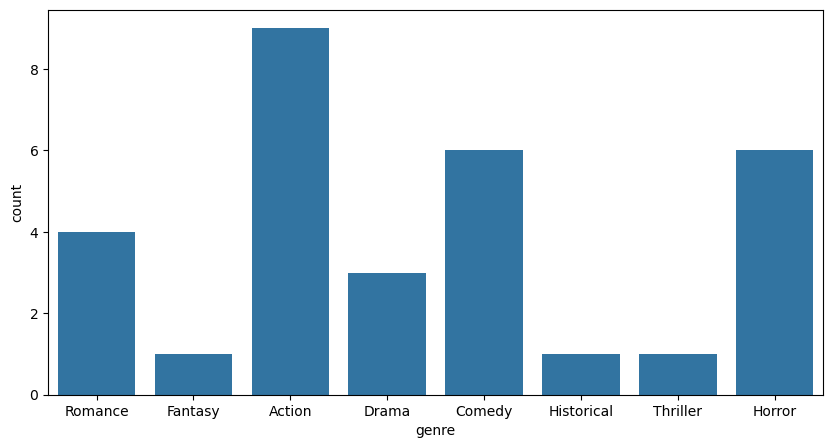

In [9]:
plt.figure(figsize = (10, 5))
sns.countplot(x = 'genre', data = df)

In [10]:
vector = TfidfVectorizer(stop_words = 'english')
cosine_vectores = vector.fit_transform(df['genre'])

In [11]:
cosin_sim = cosine_similarity(cosine_vectores)

In [12]:
def get_recommendations(title):
    idx = df.index[df['title'] == title][0]
    sim_scores = list(enumerate(cosin_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6] # Get 5 most similar movies
    movie_indices = [i[0] for i in sim_scores]
    return df['title'].loc[movie_indices]

In [13]:
get_recommendations('Eega')

0                  Arjun Reddy
2                   Magadheera
3     Baahubali: The Beginning
4    Baahubali: The Conclusion
5                   Malliswari
Name: title, dtype: object